📐 DIFFERENTIAL GEOMETRY FOR MACHINE LEARNING
🧠 From Mathematical Theory to Practical Implementation
🚀 STARTING DIFFERENTIAL GEOMETRY LEARNING SESSION

🌍 THE MANIFOLD HYPOTHESIS

💡 CORE INSIGHT: High-dimensional data doesn't fill the entire space!

❌ WRONG ASSUMPTION (Classical ML):
   Data points are scattered randomly in R^n
   Distance = Euclidean = √[(x₁-y₁)² + (x₂-y₂)² + ... + (xₙ-yₙ)²]

✅ REALITY (Manifold Learning):
   Data lives on a low-dimensional manifold M ⊂ R^n
   where dim(M) << n
   True distance = geodesic distance along M

🎯 EXAMPLES:
   • Face images: 1M pixels, but ~100 degrees of freedom
   • Audio signals: 44kHz samples, but ~50 phonetic dimensions  
   • Document embeddings: 768D vectors, but ~10-20 semantic dimensions
   • Neural network weights: millions of parameters, but low-rank structure

🔥 WHY THIS MATTERS:
   • Euclidean distance in high-D is meaningless
   • Need geometry-aware algorithms
   • Leads to better optimization and generalization
        

📐 RIE

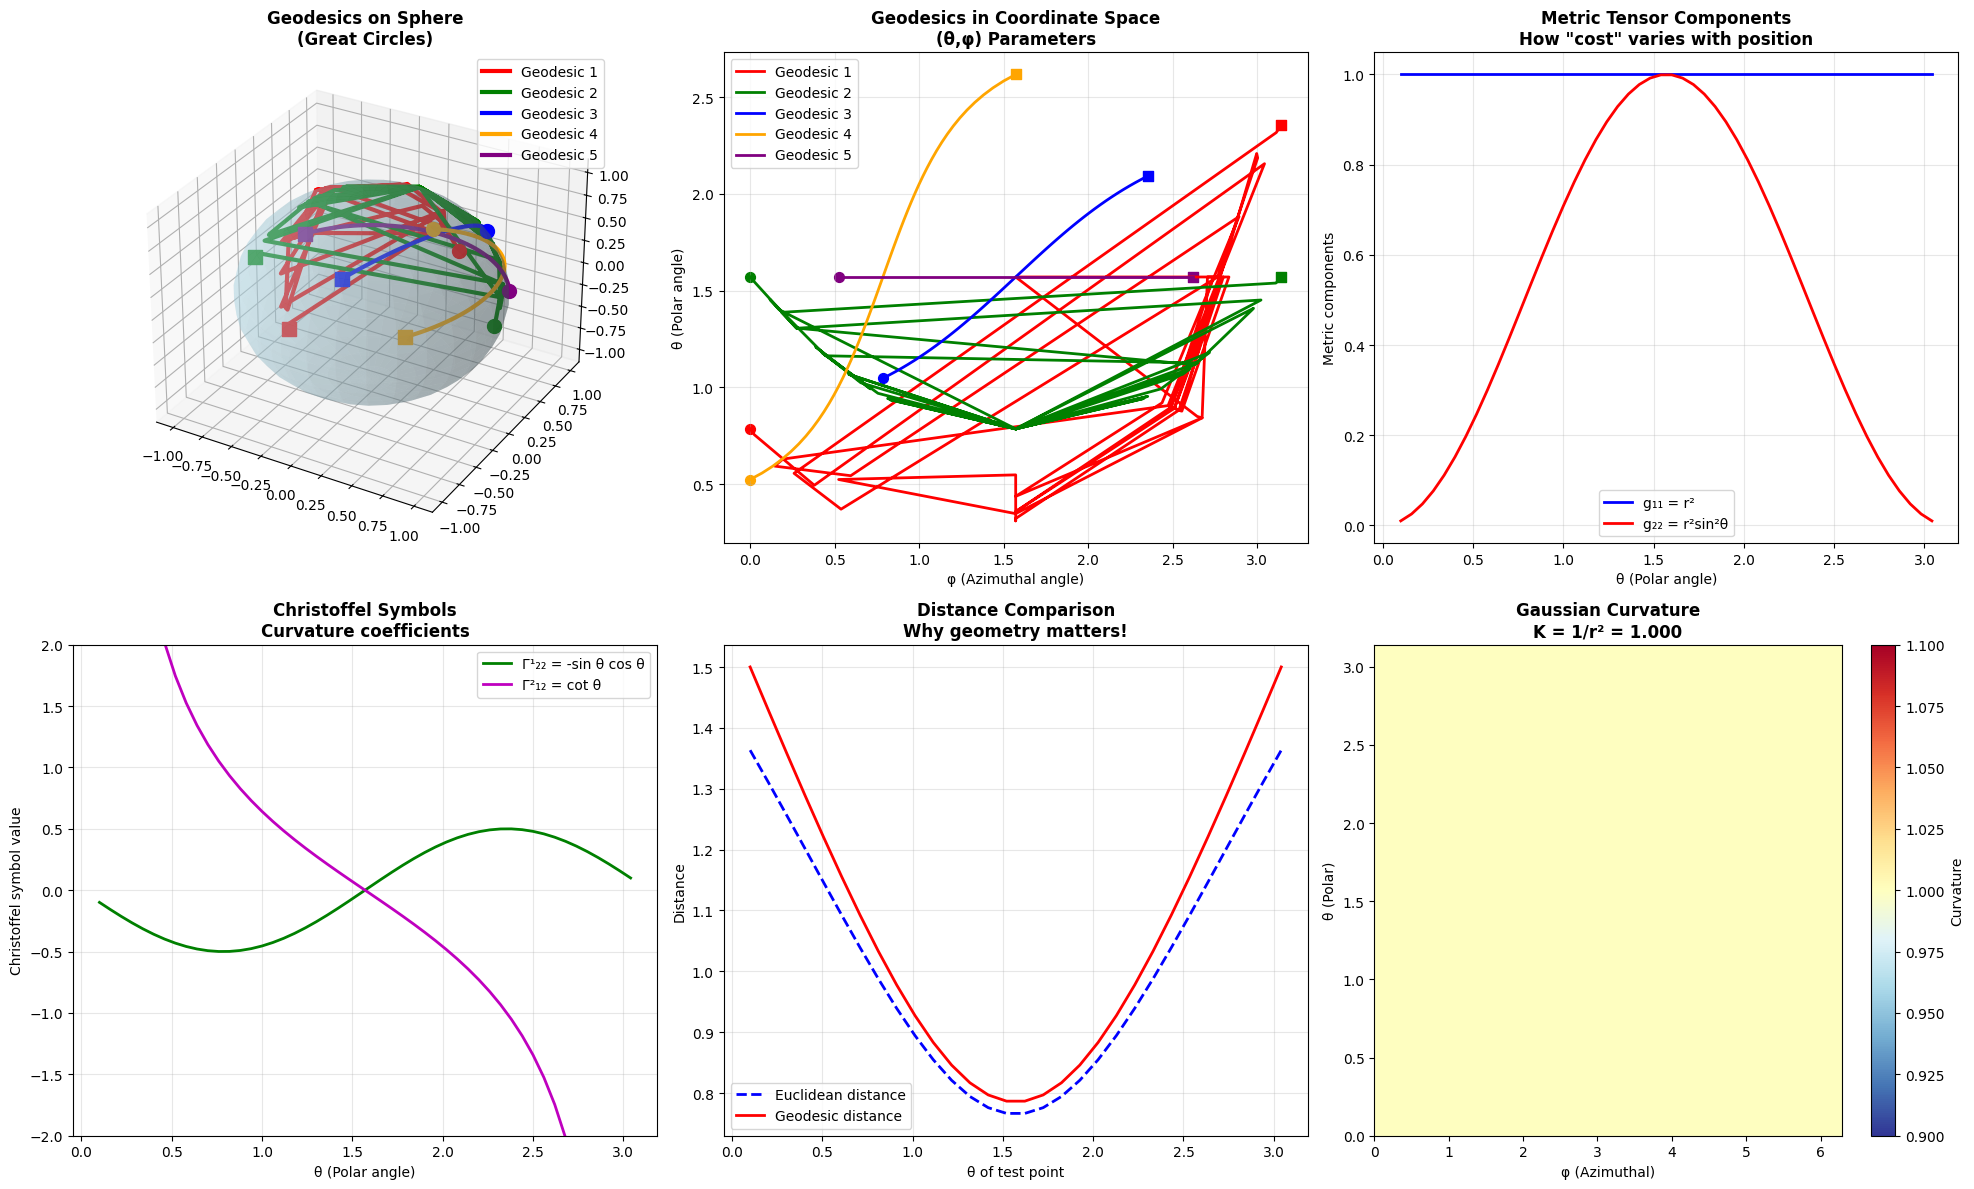

✅ Visualization complete! Study each subplot to build intuition.

🚀 ML APPLICATION: Natural Gradients

🎯 PROBLEM: Standard gradient descent ignores parameter space geometry

❌ Standard gradient: θ ← θ - α ∇f(θ)
✅ Natural gradient: θ ← θ - α G⁻¹(θ) ∇f(θ)

Where G(θ) is the Fisher Information Matrix (metric tensor)
        
Standard gradient: [ 0.1  -0.05]
Natural gradient: [ 0.1   -0.025]
Difference factor: [1.  0.5]

🔬 CONNECTION TO MANIFOLD LEARNING

📚 ALGORITHMS THAT USE DIFFERENTIAL GEOMETRY:

🔸 ISOMAP: Uses geodesic distances
   - Build neighborhood graph
   - Compute shortest path distances (approximates geodesics)
   - Apply MDS to preserve these distances

🔸 UMAP: Uses Riemannian geometry  
   - Local metric learning
   - Fuzzy topological representation
   - Cross-entropy optimization

🔸 Variational Autoencoders:
   - Latent space is a learned manifold
   - Decoder defines coordinate charts
   - Prior defines metric structure

🔸 Graph Neural Networks:
   - Graph structure defin

In [ ]:
# Differential Geometry for Machine Learning
# Theory + Implementation + Intuition

"""
🎯 LEARNING ROADMAP:
1. 🧠 Mathematical Theory (WHY)
2. 🔧 Implementation (HOW) 
3. 🎨 Visualization (SEE)
4. 🚀 ML Applications (USE)

📚 CORE CONCEPTS WE'LL MASTER:
- Manifolds: Curved spaces that look flat locally
- Metric Tensors: How to measure distances and angles
- Christoffel Symbols: Encode curvature information
- Geodesics: Shortest paths on curved surfaces
- Parallel Transport: Moving vectors while staying "parallel"
- Connection to ML: Natural gradients, manifold learning, geometric deep learning
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import symbols, Matrix, diff, simplify, cos, sin, sqrt, pi, atan2, acos
import torch
import torch.nn as nn
from scipy.optimize import minimize
import seaborn as sns

print("📐 DIFFERENTIAL GEOMETRY FOR MACHINE LEARNING")
print("🧠 From Mathematical Theory to Practical Implementation")
print("=" * 70)

# ============================================================================
# PART 1: THEORETICAL FOUNDATIONS
# ============================================================================

class DifferentialGeometryTheory:
    """
    Interactive theory explanations with mathematical rigor
    """
    
    @staticmethod
    def explain_manifold_hypothesis():
        """
        🧠 THE MANIFOLD HYPOTHESIS - Why we need curved geometry
        """
        print("\n" + "="*60)
        print("🌍 THE MANIFOLD HYPOTHESIS")
        print("="*60)
        
        print("""
💡 CORE INSIGHT: High-dimensional data doesn't fill the entire space!

❌ WRONG ASSUMPTION (Classical ML):
   Data points are scattered randomly in R^n
   Distance = Euclidean = √[(x₁-y₁)² + (x₂-y₂)² + ... + (xₙ-yₙ)²]

✅ REALITY (Manifold Learning):
   Data lives on a low-dimensional manifold M ⊂ R^n
   where dim(M) << n
   True distance = geodesic distance along M

🎯 EXAMPLES:
   • Face images: 1M pixels, but ~100 degrees of freedom
   • Audio signals: 44kHz samples, but ~50 phonetic dimensions  
   • Document embeddings: 768D vectors, but ~10-20 semantic dimensions
   • Neural network weights: millions of parameters, but low-rank structure

🔥 WHY THIS MATTERS:
   • Euclidean distance in high-D is meaningless
   • Need geometry-aware algorithms
   • Leads to better optimization and generalization
        """)
    
    @staticmethod
    def explain_metric_tensor():
        """
        📐 METRIC TENSOR - How to measure on curved surfaces
        """
        print("\n" + "="*60)
        print("📐 RIEMANNIAN METRIC TENSOR")
        print("="*60)
        
        print("""
🤔 THE FUNDAMENTAL QUESTION: How do you measure distance on a curved surface?

📏 MATHEMATICAL ANSWER: The Metric Tensor g

DEFINITION:
   At each point p on manifold M, the metric tensor g_p defines:
   • Inner products: ⟨u,v⟩_p = Σᵢⱼ gᵢⱼ(p) uⁱ vʲ
   • Distances: ds² = Σᵢⱼ gᵢⱼ(x) dxⁱ dxʲ
   • Angles: cos θ = ⟨u,v⟩/(|u||v|)

🌍 SPHERE EXAMPLE (radius r, coordinates θ,φ):
   ds² = r²dθ² + r²sin²θ dφ²
   
   Metric tensor matrix:
   g = [r²      0     ]
       [0   r²sin²θ  ]

💡 PHYSICAL INTERPRETATION:
   • g₁₁ = r²: Moving in θ direction costs r² per unit
   • g₂₂ = r²sin²θ: Moving in φ direction costs more near poles
   • g₁₂ = 0: θ and φ directions are orthogonal

🚀 ML CONNECTION:
   • Fisher Information Matrix = metric on probability distributions
   • Natural gradients use this metric for better optimization
   • VAE latent space should have learned metric structure
        """)
    
    @staticmethod
    def explain_christoffel_symbols():
        """
        🔄 CHRISTOFFEL SYMBOLS - The curvature coefficients
        """
        print("\n" + "="*60)
        print("🔄 CHRISTOFFEL SYMBOLS - ENCODING CURVATURE")
        print("="*60)
        
        print("""
🎯 THE CORE QUESTION: How do coordinate systems change as you move?

🧮 MATHEMATICAL ANSWER: Christoffel Symbols Γᵏᵢⱼ

PHYSICAL MEANING:
   Γᵏᵢⱼ = "When you move in direction j, how much does the 
            k-component of basis vector eᵢ change?"

FORMULA:
   Γᵏᵢⱼ = ½ gᵏˡ (∂gₗᵢ/∂xʲ + ∂gₗⱼ/∂xⁱ - ∂gᵢⱼ/∂xˡ)

🔍 WHAT THIS MEANS:
   • If metric g is constant → Γ = 0 → FLAT SPACE
   • If metric changes → Γ ≠ 0 → CURVED SPACE
   • Γ symbols = "derivatives of the metric" = curvature info

🌍 SPHERE EXAMPLES:
   • Γ¹₂₂ = -sin θ cos θ: Moving in φ near equator curves you in θ
   • Γ²₁₂ = Γ²₂₁ = cot θ: Longitude lines converge at poles
   • Most others = 0: High symmetry of sphere

🚀 ML APPLICATIONS:
   • Natural gradient: θ ← θ - α G⁻¹(θ) ∇f(θ)
   • G⁻¹ involves computing these symbols!
   • Geometric optimization on neural network manifolds
        """)
    
    @staticmethod
    def explain_geodesics():
        """
        🛤️ GEODESICS - Shortest paths on curved surfaces
        """
        print("\n" + "="*60)
        print("🛤️ GEODESICS - NATURAL PATHS ON MANIFOLDS")
        print("="*60)
        
        print("""
✈️ THE QUESTION: What's the shortest path between two points on Earth?

🌍 ANSWER: Great circles! (Airplane routes)

📐 MATHEMATICAL DEFINITION:
   Geodesics = curves with zero acceleration in the manifold
   
   Geodesic equation:
   d²xᵏ/dt² + Γᵏᵢⱼ (dxⁱ/dt)(dxʲ/dt) = 0

🧠 INTUITION:
   • In flat space: geodesics = straight lines
   • On sphere: geodesics = great circles  
   • On neural loss surfaces: geodesics = natural gradient paths

🔥 WHY CHRISTOFFEL SYMBOLS APPEAR:
   The Γᵏᵢⱼ terms are "curvature corrections"
   They bend the path to follow the manifold's geometry

🚀 ML CONNECTIONS:
   • Optimization: Follow geodesics on loss surface
   • Interpolation: Linear interpolation on manifold
   • Clustering: Group points with small geodesic distances
   • Generation: Sample along geodesic paths
        """)

# ============================================================================
# PART 2: HANDS-ON IMPLEMENTATION
# ============================================================================

class SphereManifold:
    """
    Complete implementation of sphere geometry with educational comments
    """
    
    def __init__(self, radius=1.0):
        self.radius = radius
        self.dimension = 2  # 2D surface in 3D space
        
        print(f"\n🌍 Created sphere manifold with radius {radius}")
        print("   This is a 2D manifold embedded in 3D space")
    
    def cartesian_to_spherical(self, point):
        """
        Convert (x,y,z) to spherical coordinates (θ,φ)
        
        THEORY: This is a coordinate chart!
        Maps manifold points to R² parameter space
        """
        x, y, z = point
        
        # Ensure point is on sphere (project if needed)
        norm = np.sqrt(x**2 + y**2 + z**2)
        if abs(norm - self.radius) > 1e-10:
            print(f"⚠️  Point not on sphere (norm={norm:.6f}), projecting...")
            x, y, z = self.radius * np.array([x, y, z]) / norm
        
        # Convert to spherical coordinates
        theta = np.arccos(z / self.radius)  # polar angle [0, π]
        phi = np.arctan2(y, x)             # azimuthal angle [-π, π]
        
        return np.array([theta, phi])
    
    def spherical_to_cartesian(self, coordinates):
        """
        Convert (θ,φ) to Cartesian (x,y,z)
        
        THEORY: This is the inverse coordinate chart
        """
        theta, phi = coordinates
        
        x = self.radius * np.sin(theta) * np.cos(phi)
        y = self.radius * np.sin(theta) * np.sin(phi)
        z = self.radius * np.cos(theta)
        
        return np.array([x, y, z])
    
    def metric_tensor(self, coordinates):
        """
        Compute Riemannian metric at given coordinates
        
        THEORY: For sphere ds² = r²dθ² + r²sin²θ dφ²
        """
        theta, phi = coordinates
        
        g = np.array([
            [self.radius**2, 0],                                    # g_θθ, g_θφ
            [0, self.radius**2 * np.sin(theta)**2]                # g_φθ, g_φφ
        ])
        
        return g
    
    def christoffel_symbols(self, coordinates, radius=None):
        """
        🎯 YOUR LEARNING CHALLENGE: Implement this!
        
        THEORY: Γᵏᵢⱼ = ½ gᵏˡ (∂gₗᵢ/∂xʲ + ∂gₗⱼ/∂xⁱ - ∂gᵢⱼ/∂xˡ)
        """
        theta, phi = coordinates
        r = radius if radius is not None else self.radius
        
        # Initialize Christoffel symbols tensor
        christoffel = np.zeros((2, 2, 2))  # Γᵏᵢⱼ
        
        # 🎯 YOUR TASK: Complete this implementation!
        
        # For sphere, the non-zero components are:
        # Γ¹₂₂ = -sin θ cos θ  (index [0,1,1])
        # Γ²₁₂ = Γ²₂₁ = cot θ  (indices [1,0,1] and [1,1,0])
        
        # TODO: Implement the general formula or use known results
        if abs(np.sin(theta)) < 1e-10:
            print(f"⚠️ Warning: Near pole (θ={theta:.6f}), cot θ → ±∞")
            cot_theta = np.sign(np.cos(theta)) * 1e10  # Large finite value
        else:
            cot_theta = np.cos(theta) / np.sin(theta)
        
        # TODO: Implement the general formula or use known results
        christoffel[0, 1, 1] = -np.sin(theta) * np.cos(theta)  # Γ¹₂₂
        christoffel[1, 0, 1] = cot_theta                       # Γ²₁₂ = cot θ  
        christoffel[1, 1, 0] = cot_theta                       

        # christoffel[0, 1, 1] = -np.sin(theta) * np.cos(theta)  # Γ¹₂₂
        # christoffel[1, 0, 1] = np.cos(theta) / np.sin(theta)   # Γ²₁₂ = cot θ  
        # christoffel[1, 1, 0] = np.cos(theta) / np.sin(theta)   # Γ²₂₁ = cot θ
        
        return christoffel
    
    def christoffel_symbols_general_sphere(theta, phi, r):
        """
        More educational: show that r cancels
        """
        # Step 1: Metric tensor components
        g11 = r**2
        g22 = r**2 * (np.sin(theta))**2
        g12 = g21 = 0
        
        # Step 2: Inverse metric
        g_inv_11 = 1/r**2              # Note: 1/r² factor
        g_inv_22 = 1/(r**2 * np.sin(theta)**2)  # Note: 1/r² factor
        
        # Step 3: Derivatives
        # ∂g₂₂/∂θ = ∂(r²sin²θ)/∂θ = 2r²sinθ cosθ  # Note: r² factor
        
        # Step 4: Christoffel symbol
        # Γ²₁₂ = ½ g²² (∂g₂₁/∂θ + ∂g₂₂/∂x¹ - ∂g₁₂/∂x²)
        #      = ½ × (1/(r²sin²θ)) × 2r²sinθ cosθ
        #      = (r² terms cancel!) = cosθ/sinθ = cot θ
        
        return "r cancels out in final result!"
    
    def geodesic_distance(self, point1_coords, point2_coords):
        """
        Compute geodesic distance (great circle distance)
        
        THEORY: This is the integral of ds along the shortest path
        """
        theta1, phi1 = point1_coords
        theta2, phi2 = point2_coords
        
        # Great circle distance formula
        cos_distance = (np.cos(theta1) * np.cos(theta2) + 
                       np.sin(theta1) * np.sin(theta2) * np.cos(phi1 - phi2))
        
        # Handle numerical errors
        cos_distance = np.clip(cos_distance, -1, 1)
        
        distance = self.radius * np.arccos(cos_distance)
        return distance
    
    def parallel_transport(self, vector, path_coordinates):
        """
        🎯 ADVANCED CHALLENGE: Parallel transport along path
        
        THEORY: Vector should remain "parallel" as it moves
        This requires solving: ∇ᵧ'(t) V = 0
        """
        # This is quite advanced! Start with simple approximation
        # TODO: Implement using Christoffel symbols
        return vector  # Placeholder
    
    def compute_geodesic_path(self, start_coords, end_coords, num_points=50):
        """
        Compute great circle path between two points
        
        THEORY: Solve geodesic equation or use geometric construction
        """
        # Convert to Cartesian for easier interpolation
        start_cart = self.spherical_to_cartesian(start_coords)
        end_cart = self.spherical_to_cartesian(end_coords)
        
        # Spherical linear interpolation (SLERP)
        # This naturally gives great circle paths
        
        # Angle between vectors
        dot_product = np.dot(start_cart, end_cart) / (self.radius**2)
        dot_product = np.clip(dot_product, -1, 1)
        omega = np.arccos(dot_product)
        
        if omega < 1e-10:  # Points are very close
            return np.array([start_coords] * num_points)
        
        path_points = []
        for i in range(num_points):
            t = i / (num_points - 1)
            
            # SLERP formula
            interpolated = (np.sin((1-t) * omega) * start_cart + 
                           np.sin(t * omega) * end_cart) / np.sin(omega)
            
            # Convert back to spherical coordinates
            coords = self.cartesian_to_spherical(interpolated)
            path_points.append(coords)
        
        return np.array(path_points)

# ============================================================================
# PART 3: VISUALIZATION AND INTUITION
# ============================================================================

def visualize_sphere_geometry():
    """
    Create comprehensive visualizations to build intuition
    """
    print("\n🎨 CREATING GEOMETRIC VISUALIZATIONS")
    print("=" * 40)
    
    sphere = SphereManifold(radius=1.0)
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 12))
    
    # 1. 3D Sphere with geodesics
    ax1 = fig.add_subplot(231, projection='3d')
    
    # Draw sphere surface
    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, np.pi, 20)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax1.plot_surface(x, y, z, alpha=0.3, color='lightblue')
    
    # Plot geodesics (great circles)
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    geodesic_pairs = [
        ([np.pi/4, 0], [3*np.pi/4, np.pi]),           # Meridian
        ([np.pi/2, 0], [np.pi/2, np.pi]),             # Equator segment
        ([np.pi/3, np.pi/4], [2*np.pi/3, 3*np.pi/4]), # Diagonal
        ([np.pi/6, 0], [5*np.pi/6, np.pi/2]),         # Complex path
        ([np.pi/2, np.pi/6], [np.pi/2, 5*np.pi/6])    # Parallel
    ]
    
    for i, (start, end) in enumerate(geodesic_pairs):
        path = sphere.compute_geodesic_path(start, end, 50)
        path_cart = np.array([sphere.spherical_to_cartesian(p) for p in path])
        
        ax1.plot(path_cart[:, 0], path_cart[:, 1], path_cart[:, 2],
                color=colors[i], linewidth=3, label=f'Geodesic {i+1}')
        
        # Mark start and end points
        start_cart = sphere.spherical_to_cartesian(start)
        end_cart = sphere.spherical_to_cartesian(end)
        ax1.scatter(*start_cart, color=colors[i], s=100, marker='o')
        ax1.scatter(*end_cart, color=colors[i], s=100, marker='s')
    
    ax1.set_title('Geodesics on Sphere\n(Great Circles)', fontsize=12, fontweight='bold')
    ax1.legend()
    
    # 2. Coordinate view
    ax2 = fig.add_subplot(232)
    for i, (start, end) in enumerate(geodesic_pairs):
        path = sphere.compute_geodesic_path(start, end, 50)
        ax2.plot(path[:, 1], path[:, 0], color=colors[i], linewidth=2, 
                label=f'Geodesic {i+1}')
        ax2.scatter(start[1], start[0], color=colors[i], s=50, marker='o')
        ax2.scatter(end[1], end[0], color=colors[i], s=50, marker='s')
    
    ax2.set_xlabel('φ (Azimuthal angle)')
    ax2.set_ylabel('θ (Polar angle)')
    ax2.set_title('Geodesics in Coordinate Space\n(θ,φ) Parameters', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # 3. Metric tensor visualization
    ax3 = fig.add_subplot(233)
    theta_range = np.linspace(0.1, np.pi-0.1, 50)
    g11_values = [sphere.radius**2] * len(theta_range)
    g22_values = [sphere.radius**2 * np.sin(theta)**2 for theta in theta_range]
    
    ax3.plot(theta_range, g11_values, 'b-', linewidth=2, label='g₁₁ = r²')
    ax3.plot(theta_range, g22_values, 'r-', linewidth=2, label='g₂₂ = r²sin²θ')
    ax3.set_xlabel('θ (Polar angle)')
    ax3.set_ylabel('Metric components')
    ax3.set_title('Metric Tensor Components\nHow "cost" varies with position', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Christoffel symbols
    ax4 = fig.add_subplot(234)
    christoffel_122 = -np.sin(theta_range) * np.cos(theta_range)
    christoffel_212 = np.cos(theta_range) / np.sin(theta_range)
    
    ax4.plot(theta_range, christoffel_122, 'g-', linewidth=2, label='Γ¹₂₂ = -sin θ cos θ')
    ax4.plot(theta_range[5:-5], christoffel_212[5:-5], 'm-', linewidth=2, label='Γ²₁₂ = cot θ')
    ax4.set_xlabel('θ (Polar angle)')
    ax4.set_ylabel('Christoffel symbol value')
    ax4.set_title('Christoffel Symbols\nCurvature coefficients', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim(-2, 2)
    
    # 5. Distance comparison: Euclidean vs Geodesic
    ax5 = fig.add_subplot(235)
    
    fixed_point = [np.pi/2, 0]  # Point on equator
    test_points_theta = np.linspace(0.1, np.pi-0.1, 30)
    test_points = [[theta, np.pi/4] for theta in test_points_theta]
    
    euclidean_distances = []
    geodesic_distances = []
    
    fixed_cart = sphere.spherical_to_cartesian(fixed_point)
    
    for test_point in test_points:
        test_cart = sphere.spherical_to_cartesian(test_point)
        
        # Euclidean distance in 3D
        euclidean_dist = np.linalg.norm(test_cart - fixed_cart)
        euclidean_distances.append(euclidean_dist)
        
        # Geodesic distance
        geodesic_dist = sphere.geodesic_distance(fixed_point, test_point)
        geodesic_distances.append(geodesic_dist)
    
    ax5.plot(test_points_theta, euclidean_distances, 'b--', linewidth=2, 
            label='Euclidean distance')
    ax5.plot(test_points_theta, geodesic_distances, 'r-', linewidth=2, 
            label='Geodesic distance')
    ax5.set_xlabel('θ of test point')
    ax5.set_ylabel('Distance')
    ax5.set_title('Distance Comparison\nWhy geometry matters!', fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Curvature visualization
    ax6 = fig.add_subplot(236)
    
    # Gaussian curvature of sphere is constant: K = 1/r²
    curvature_value = 1 / sphere.radius**2
    theta_grid = np.linspace(0, np.pi, 20)
    phi_grid = np.linspace(0, 2*np.pi, 30)
    curvature_grid = np.full((len(theta_grid), len(phi_grid)), curvature_value)
    
    im = ax6.imshow(curvature_grid, extent=[0, 2*np.pi, 0, np.pi], 
                   aspect='auto', cmap='RdYlBu_r')
    ax6.set_xlabel('φ (Azimuthal)')
    ax6.set_ylabel('θ (Polar)')
    ax6.set_title(f'Gaussian Curvature\nK = 1/r² = {curvature_value:.3f}', fontweight='bold')
    plt.colorbar(im, ax=ax6, label='Curvature')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualization complete! Study each subplot to build intuition.")

# ============================================================================
# PART 4: ML APPLICATIONS AND EXERCISES
# ============================================================================

class ManifoldMLApplications:
    """
    Connect differential geometry to practical ML
    """
    
    @staticmethod
    def natural_gradient_example():
        """
        Demonstrate natural gradients using Fisher information metric
        """
        print("\n🚀 ML APPLICATION: Natural Gradients")
        print("=" * 40)
        
        print("""
🎯 PROBLEM: Standard gradient descent ignores parameter space geometry

❌ Standard gradient: θ ← θ - α ∇f(θ)
✅ Natural gradient: θ ← θ - α G⁻¹(θ) ∇f(θ)

Where G(θ) is the Fisher Information Matrix (metric tensor)
        """)
        
        # Simple example: Gaussian distribution parameters
        def fisher_information_gaussian(mu, sigma):
            """Fisher information matrix for Gaussian(mu, sigma²)"""
            G = np.array([
                [1/sigma**2, 0],          # ∂²/∂μ²
                [0, 2/sigma**2]           # ∂²/∂σ²  
            ])
            return G
        
        # Demonstrate difference
        mu, sigma = 0.0, 1.0
        grad = np.array([0.1, -0.05])  # Example gradient
        
        G = fisher_information_gaussian(mu, sigma)
        natural_grad = np.linalg.solve(G, grad)
        
        print(f"Standard gradient: {grad}")
        print(f"Natural gradient: {natural_grad}")
        print(f"Difference factor: {natural_grad / (grad + 1e-10)}")
    
    @staticmethod
    def manifold_learning_connection():
        """
        Connect to manifold learning algorithms
        """
        print("\n🔬 CONNECTION TO MANIFOLD LEARNING")
        print("=" * 40)
        
        print("""
📚 ALGORITHMS THAT USE DIFFERENTIAL GEOMETRY:

🔸 ISOMAP: Uses geodesic distances
   - Build neighborhood graph
   - Compute shortest path distances (approximates geodesics)
   - Apply MDS to preserve these distances

🔸 UMAP: Uses Riemannian geometry  
   - Local metric learning
   - Fuzzy topological representation
   - Cross-entropy optimization

🔸 Variational Autoencoders:
   - Latent space is a learned manifold
   - Decoder defines coordinate charts
   - Prior defines metric structure

🔸 Graph Neural Networks:
   - Graph structure defines discrete manifold
   - Message passing ≈ parallel transport
   - Node embeddings live in tangent spaces
        """)

# ============================================================================
# PART 5: YOUR LEARNING EXERCISES
# ============================================================================

def create_learning_exercises():
    """
    Structured exercises to master the concepts
    """
    print("\n🎯 YOUR LEARNING EXERCISES")
    print("=" * 50)
    
    exercises = {
        "1. 📐 Complete Christoffel Symbols": {
            "task": "Implement christoffel_symbols() using the general formula",
            "hint": "Use symbolic differentiation with SymPy",
            "difficulty": "⭐⭐⭐",
            "learning": "Understand how curvature is encoded"
        },
        
        "2. 🔄 Parallel Transport": {
            "task": "Implement parallel_transport() along geodesic paths",
            "hint": "Solve ODE: dV/dt + Γ(γ'(t), V) = 0",
            "difficulty": "⭐⭐⭐⭐",
            "learning": "How vectors change on curved spaces"
        },
        
        "3. 🌐 New Manifold": {
            "task": "Implement hyperbolic plane (Poincaré disk model)",
            "hint": "Metric: ds² = 4(dx² + dy²)/(1 - x² - y²)²",
            "difficulty": "⭐⭐⭐⭐",
            "learning": "Negative curvature geometry"
        },
        
        "4. 🧮 Curvature Tensor": {
            "task": "Compute Riemann curvature from Christoffel symbols",
            "hint": "R^k_{ijd} = ∂Γ^k_{id}/∂x^j - ∂Γ^k_{ij}/∂x^d + Γ^k_{ja}Γ^a_{id} - Γ^k_{da}Γ^a_{ij}",
            "difficulty": "⭐⭐⭐⭐⭐",
            "learning": "Deep geometric invariants"
        },
        
        "5. 🚀 ML Integration": {
            "task": "Use sphere manifold for constrained neural network weights",
            "hint": "Project weights to sphere after each update",
            "difficulty": "⭐⭐⭐",
            "learning": "Practical manifold constraints"
        },
        
        "6. 📊 Manifold Learning": {
            "task": "Implement ISOMAP using your geodesic distance function",
            "hint": "Graph shortest paths approximate geodesics",
            "difficulty": "⭐⭐⭐⭐",
            "learning": "Connect theory to algorithms"
        }
    }
    
    for name, details in exercises.items():
        print(f"\n{name}")
        print(f"   Task: {details['task']}")
        print(f"   Hint: {details['hint']}")
        print(f"   Difficulty: {details['difficulty']}")
        print(f"   Learning: {details['learning']}")
    
    print(f"\n💡 START WITH EXERCISE 1 - it's the foundation for everything else!")
    return exercises

# ============================================================================
# MAIN EXECUTION AND LEARNING PATH
# ============================================================================

def main_learning_session():
    """
    Complete learning session: theory + implementation + practice
    """
    print("🚀 STARTING DIFFERENTIAL GEOMETRY LEARNING SESSION")
    print("=" * 60)
    
    # Part 1: Theory
    theory = DifferentialGeometryTheory()
    theory.explain_manifold_hypothesis()
    theory.explain_metric_tensor()
    theory.explain_christoffel_symbols()
    theory.explain_geodesics()
    
    # Part 2: Implementation
    print("\n🔧 HANDS-ON IMPLEMENTATION")
    sphere = SphereManifold(radius=1.0)
    
    # Test basic operations
    test_point = [np.pi/3, np.pi/4]
    print(f"Test point: θ={test_point[0]:.3f}, φ={test_point[1]:.3f}")
    
    # Metric tensor
    g = sphere.metric_tensor(test_point)
    print(f"Metric tensor:\n{g}")
    
    # Christoffel symbols
    christoffel = sphere.christoffel_symbols(test_point)
    print(f"Non-zero Christoffel symbols:")
    print(f"  Γ¹₂₂ = {christoffel[0,1,1]:.6f}")
    print(f"  Γ²₁₂ = {christoffel[1,0,1]:.6f}")
    
    # Test geodesic distance
    point1 = [np.pi/4, 0]
    point2 = [3*np.pi/4, np.pi]
    dist = sphere.geodesic_distance(point1, point2)
    print(f"Geodesic distance: {dist:.6f}")
    
    # Part 3: Visualization
    visualize_sphere_geometry()
    
    # Part 4: ML Applications
    ml_apps = ManifoldMLApplications()
    ml_apps.natural_gradient_example()
    ml_apps.manifold_learning_connection()
    
    # Part 5: Exercises
    exercises = create_learning_exercises()
    
    print("\n🎓 LEARNING SESSION COMPLETE!")
    print("=" * 40)
    print("✅ Theory: Manifolds, metrics, curvature")
    print("✅ Implementation: Sphere geometry")  
    print("✅ Visualization: Geometric intuition")
    print("✅ Applications: ML connections")
    print("✅ Exercises: Hands-on practice")
    
    print("\n🎯 NEXT STEPS:")
    print("1. Complete Exercise 1 (Christoffel symbols)")
    print("2. Try implementing hyperbolic geometry")
    print("3. Connect to your document intelligence project")
    print("4. Move to system design for geometric computations")
    
    return sphere, exercises

if __name__ == "__main__":
    sphere, exercises = main_learning_session()
    
    print("\n💡 Ready to start Exercise 1? Let's implement those Christoffel symbols! 🚀")